<a href="https://colab.research.google.com/github/Sai-Kale/AWS_LEARNING/blob/master/AWS_Networking/Networking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AWS NETWORKING**

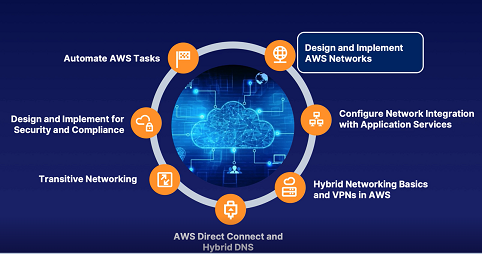

**Design and Implement AWS Networks:**

AWS has a region in which we have multiple Availability Zones.
Ex: US-West-1 have 4 AZ. US-west-1a, us-west-1b,1c,-1d etc.,..
Edge Locations: Where content is cached to server faster with Low Latency. If its the first request AWS will get the content from the AZ and cache it at the Edge Location.

As a user of AWS you can user public and private services.
Private serivces are known as VPC capable services. The Entire region falls under a single VPC in our account either the default one provided by AWS or Specific one which we create. 
Under the VPC we can create the Subnets attached to a Specific AZ (Subnets dont span across the AZ). These subnets can be either private or public
They are few Services in the AWS that are Public and they live half way between the Internet and VPC and are accessible from the internet. They also can be accessed by the VPC via the Internet Gateway Object. An IGW is attached to the VPC when you create it. So that reources within your VPC can access the Internet & other AWS public services.
There are  few other sevices that fall within the public IP range:
Ex: CloudFrontEdge Locations, Route53, AWS Direct Connect Lcoations etc.,..
Refer Below Picture for better Understanding.

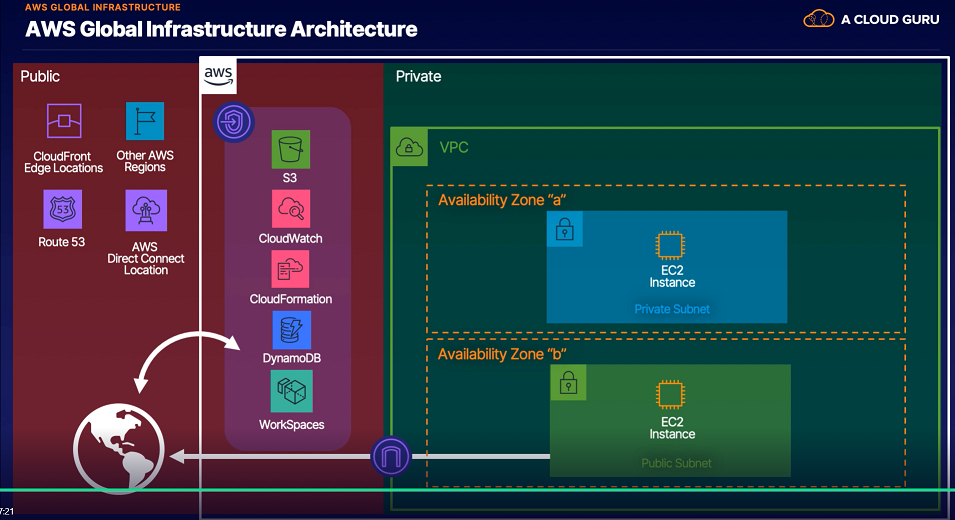

**VPC Basic Networking Design**

VPC(Virtual Private Cloud): A VPC lets you provision a logically isolated section of the AWS CLoud. You can launch a different resources in virtual Network that you design.You have complete control over the virtual networking env, selection of IP address range, creation of subnets and configuration of routing tables and network gateways.



*   You can have mutiple VPCs per region
*   Each region can have a max 5 VPC by default this can be increased.
*   Each region has a default VPC that AWS has already setup to get started quickly.
*   VPC can't span across region. so you will have different VPC if app is spread across different regions.
*   Creating a VPC:
-> VPC Name tag
-> CIDR Block (IPv4 & IPv6)
-> Tenancy.
Choosing the appropriate CIDR range is important for your VPC.
CIDR and Tenancy can't changed once created. We have to recreate it.
Tenancy: its default or dedicated. Dedicated means when we create a EC2 in a VPC it will be created under a dedicated hardware and its costly.
If its default  it will give option to change resource to dedicated mode later if needed.
*   Mutiple VPC: In general in large scale organizations we might have mutiple VPC. Also we need to connect to that our corporate DC as most of them expected to have atleast of their own. So its important to correctly choose the CIDR range. We can optionally choose IPv6 CIDR range while creating a VPC.
*   IPv4 vs IPv6:


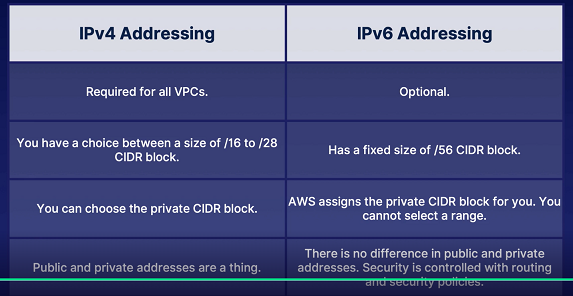




Need to write

# **Subnets:**


*   Seperates a specified CIDR range within an AZ.
* AWS by default create a subnet for each of AZ within the default VPC in a region.

    A Segment of VPC that lives entirely within a single AZ. Subnets can't span more than a single AZ.Subnets can be public, private or VPN only.

AWS provides 3 CIDR ranges as menitioned below. Most commonly used is startign from 10.0.0.0

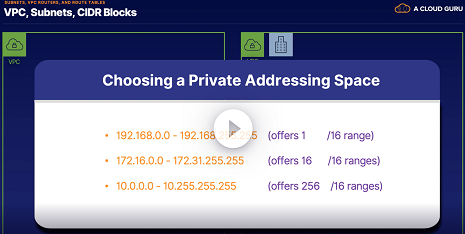

CIDR block choosing is an important step. Below picture shows the various things to be considered before selecting a CIDR for VPC.

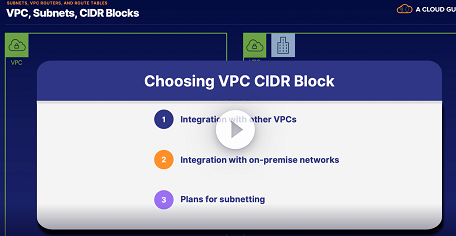

AWS Subnet Addressing:

*  Specfy target AZ: you can create 0,1 or more subnets in AZ. When creating a subnet you must specify a target AZ.
*  Determine the CIDR
*  AWS Reserved address: AWS reserves the first 4 and the last IpV4 address of every subnet for networking purposes.

VPC Router:
* A logical construct where all routing decisions begin. Routing decisions are goverend by the route tables associated with the VPC and subnets. This is the first place where packets hit when leaving the resources that are withing the VPC/subets.

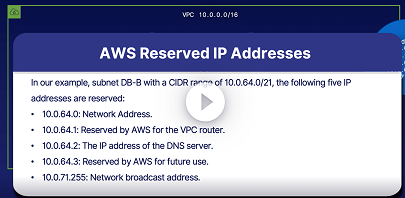

Route Table:

When you create a VPC there is also another component that is created known as Main Route Table. Route table govern where the next entry is when the packets hits the VPC router. The destination in a route table can be either a CIDR range or a prefix list. Prefix list is used when destionation is VPC gateway endpoint. Target value in the route table can include IGW, NAT Gateway,VPC peers or ENI etc.,.. Main route table has a static entry that provides access to the entire VPC. We can then create a custom route table and attach it to a particular subnet.  If there is no custom route table then the subnet by default uses the main route table.
* The best partice is to use the custom route tables for each of the subnet. Else the subnet by default chooses the main route table. 

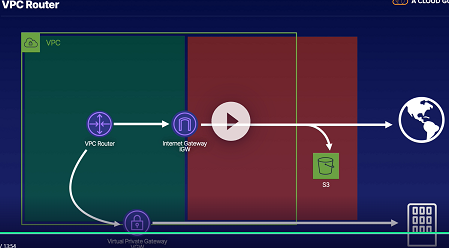

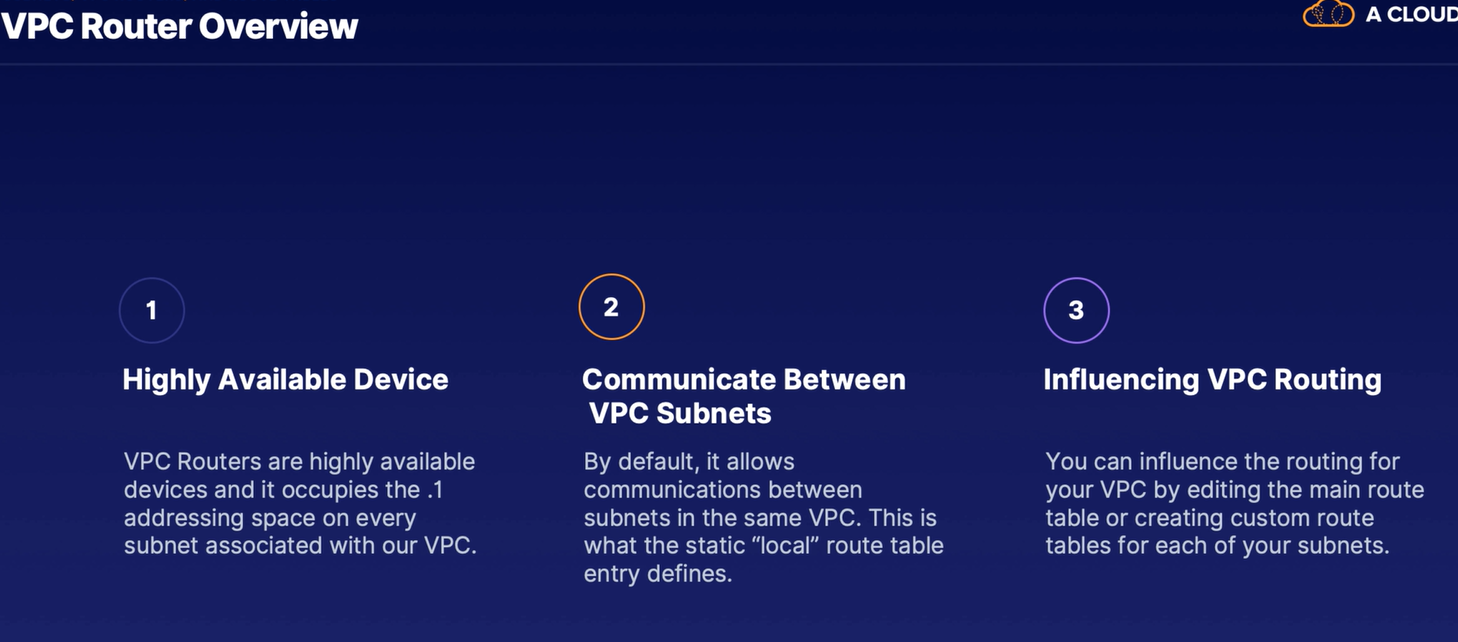

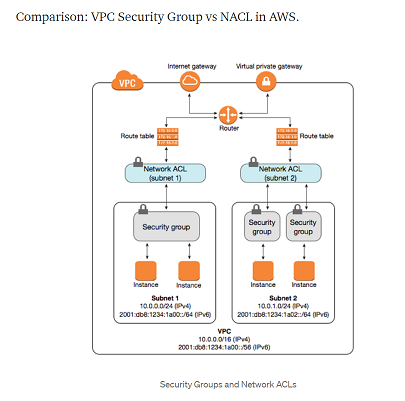

**Route Table:**
* When a VPC is created a default Main Route table will be created.
* It has access to the resources within the VPC via a static route table rule which can't be edited.
* For deafult VPC created by AWS the Main Route table is having the Static route as well as IGW.
* We can create custom route tables and attach them to the speicfic Subnets.
* These are attached to the subnet level. The packets first enter via the VPC router and gets redirected using the main route table rules followed by custom routes table for the specific subnets.
* Note the Difference b/w Main (Default) Route table created while creating a VPC and custom route table.
* By default the subnet is assocaited with the default route table of VPC in which subnet is created unless we attach a custom route table.


**Elasic Network Interface(ENI):**

A virtual network interface that you can attach to an instance inside a VPC. upon creation, ENIsare inside a VPC and are associated with a subnet.
ENI has
* Primary IPv4 address.
* MAC address
* At least one SG. ( we can attach mutiple though).




1.   ENI are created by default when an instance is created inside a subnet.
2.   ENI is associated with a default private and public IP which is destroyed up instance recreation.
3. MAC address is attached to the ENI upon creation till its lifecycle.
4. Elastic IP is different from Public IP. They out live the lifecycle of an instance and can be attached even after the instacne creation. It is created when we want to attach an fixed IP attached to an instance.
5. Source/Dest check that is used enable/disable the dropping of packets. always must be left default.
6. SG is associated to the default ENI created upon the instacne creation. Remeber SG is not associated to the Instance but the ENI attached to the instance.  We can have max 5 SG attached to the ENI by default which can be increased futher.
7. ENI is local to a AZ. can't be moved to another AZ.
8. Any ENI that is not the default. can be detached and attached any other instance within the AZ. By this we can have mutiple IP for an instance.
9. ENI allows us to have flexible IP addressing for an instance.

Note: you cannot expect to have Mutiple ENI attached to an EC2 instance and expect it to have an Improved bandwidth. which is also known as **NIC teaming.**


**Elastic IP: **
Keeping your IP static even when your underlying infrstructure changes.
By default we can create 5 and can be increased further upon on demand.
Based on the isntance type the number of IP that can be attached to it are LIMITED.




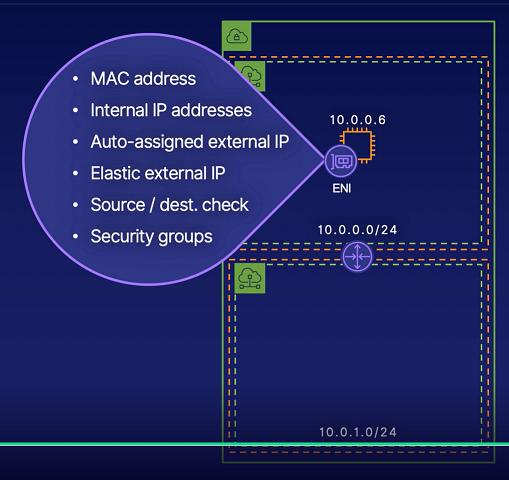

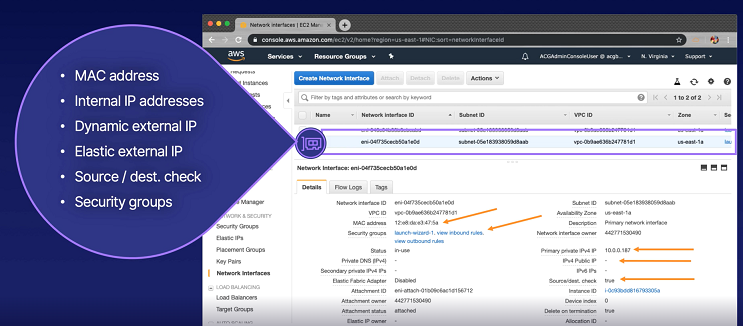

**Internet Gateway(IGW):**

Translates Public IPs to Private IPs address and vice versa.
A highly scalable VPC component that allows communication between instances in your VPC and the internet. when an instance recieves the traffic from internet the IGW translates the destination address to the instances private IP and forwards the traffic to the VPC.

* We can create and attach IGW to the edge of our VPC. One IGW per region. We can only create one IGW per VPC and every VPC can have only once IGW. 
* The internet access to an EC2 instance is forwarded from IGW to the VPC router and goverened by the Route table rules attached to the subnet in which the instance resides. This could be a custom route table or default main route table. Refer below picture.

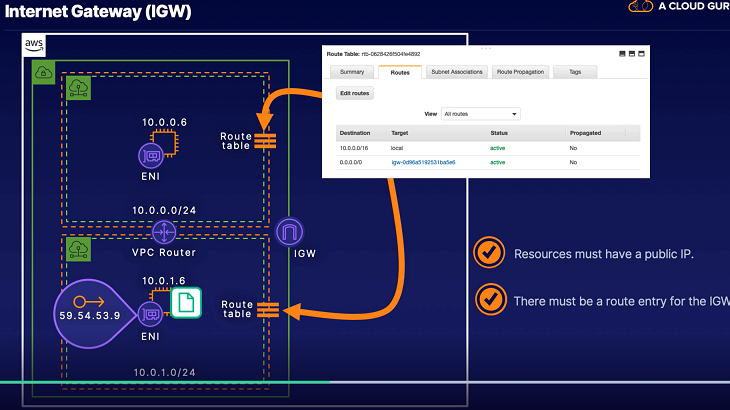

Aplication(Dual-Homed Instance):
* Suppose we want an instance within an AZ to be available within the both the subnets. This can be achieved via ENI that are created within the different subnets. An instance can be mutil home within the same AZ it cant span across different AZ as ENI are specific to the AZ in which its created and subnets attached to it. (Remember subnets are attached to ENI and those in turn are attached to the Instances . SG are not directly attached to the Instances)
REFER BELOW.

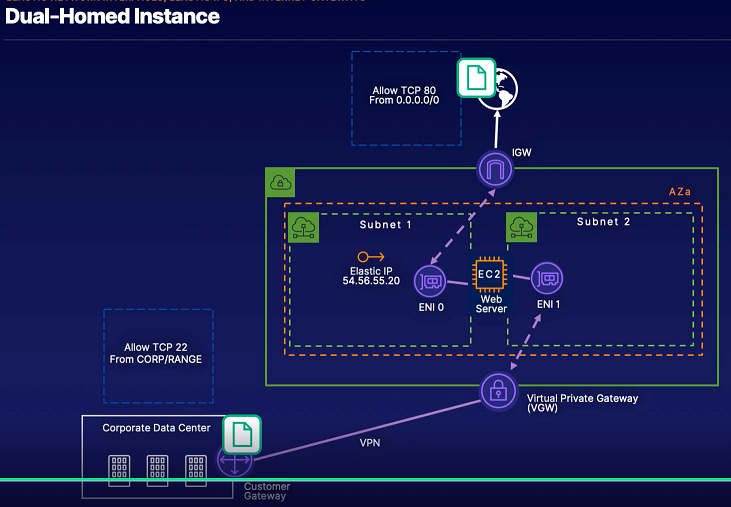

TBD